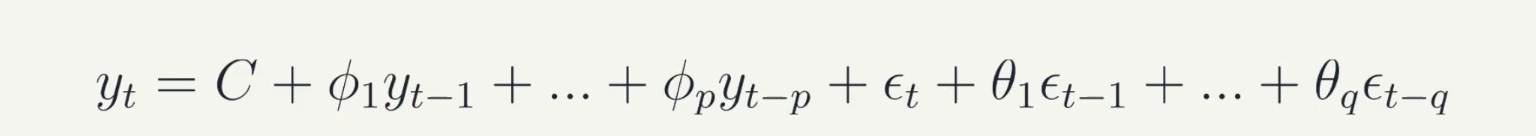

### ARMA Model is simply the combination of AR and MA Model.

### If both the ACF and PACF plot show a `sinusoidal or decaying pattern`, then we have an ARMA Process. ACF and PACF cannot be used to find the order of ARMA.


### `General Modelling Procedure:`

### 1. Starts by performing a stationary test and if its not, we apply transformation until it is.
### 2. List the possible combinations of P,q
### 3. Fit every ARMA(p,q) combination
### 4. `Select the model with lowest AIC`
### 5. Perform Residual Analysis - Q-Q Plot shows a strainght line?  and Residuals are uncorrelated? IF YES, THE MODEL IS READY FOR FORECAST

### `Akaike's Information Criteria(AIC)`: This is a measure of the quality of a model `in relation` to other models.

### AIC is a relative measure not an absolute measure.

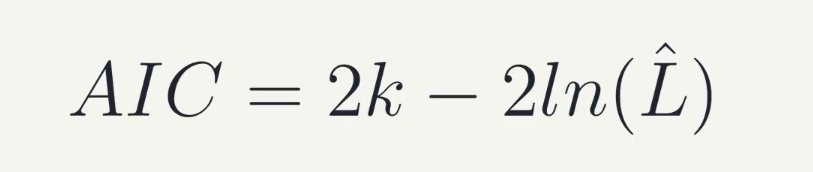

### AIC depends on the `number of parameters and likelihood function`

### If we have a lot of parameters, usually we get a `better fit` but it `penalises AIC`

### Likelihood function is the inverse of `Distribution function`

### In  Distribution function, given the parameters we calculate the probability of outcomes while in likelihood function, given the outcomes we estimate the parameters.

### `AIC strikes a balance between underfitting and overfitting`. Overfitting occurs when `AIC is large (when k and L are large)`. Underfitting occurs when `AIC is small(When k and L are small)`


### `Ljung box test`: It is used to determine if the data is autocorrelated or not. Null hypothesis: No Autocorrelation. if P > 0.05, then residuals are uncorrelated and independent.


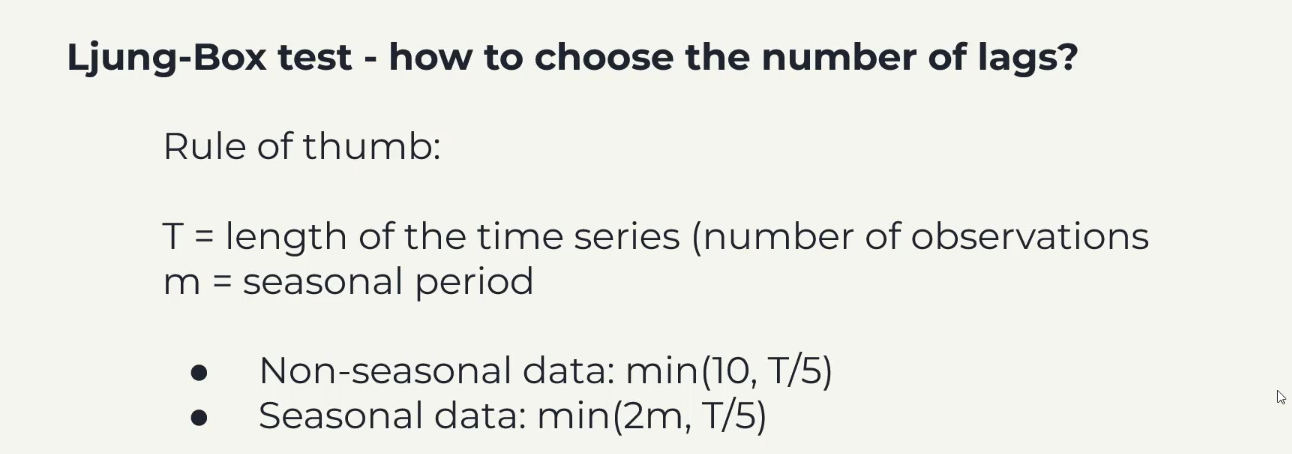

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
np.random.seed(42)

ar1 = np.array([1, -0.33])
ma1 = np.array([1, 0.9])

ARMA_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)

In [4]:
ADF_result = adfuller(ARMA_1_1)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -6.429878682042691
p-value: 1.7078466680096923e-08


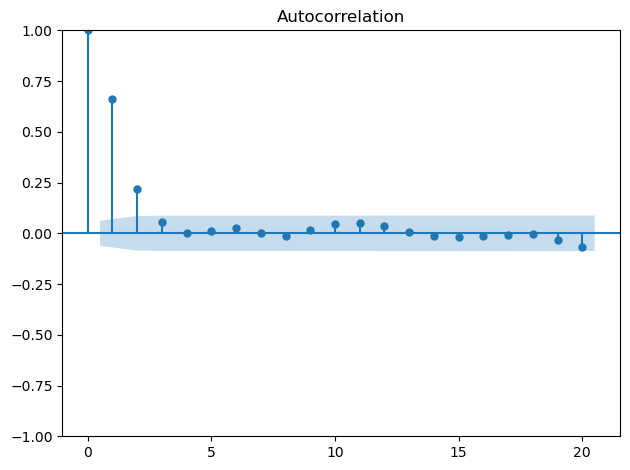

In [16]:
plot_acf(ARMA_1_1, lags=20);

plt.tight_layout()


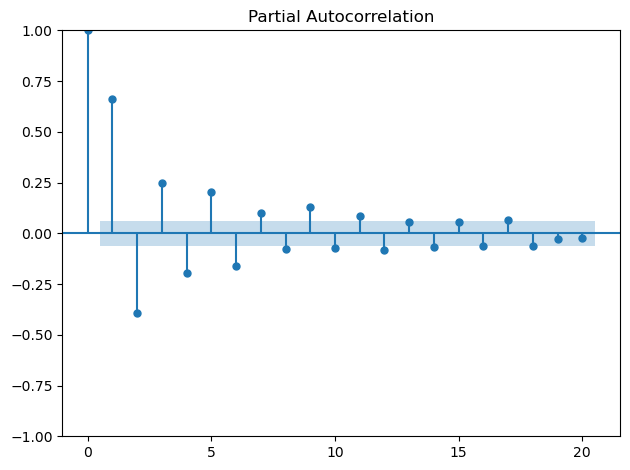

In [15]:
plot_pacf(ARMA_1_1, lags=20);

plt.tight_layout()


In [7]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)

order_list = list(product(ps, qs))
print(order_list)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


In [8]:
from typing import Union

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [9]:
result_df = optimize_ARMA(ARMA_1_1, order_list)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC
0,"(1, 1)",2801.407785
1,"(2, 1)",2802.906070
2,"(1, 2)",2802.967762
3,"(0, 3)",2803.666793
4,"(1, 3)",2804.524027
5,"(3, 1)",2804.588567
6,"(2, 2)",2804.822282
7,"(3, 3)",2806.139215
8,"(2, 3)",2806.175380
9,"(3, 2)",2806.894930


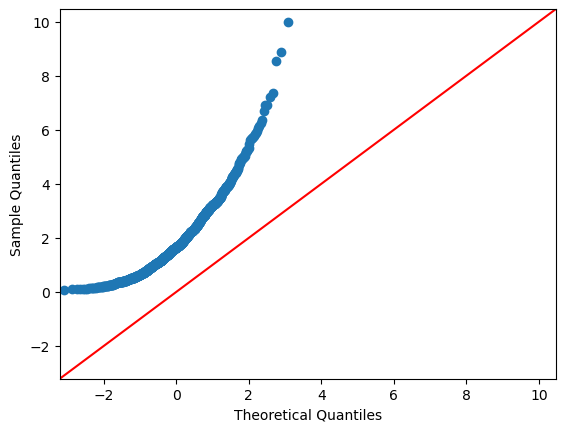

In [14]:
from statsmodels.graphics.gofplots import qqplot

gamma = np.random.default_rng().standard_gamma(shape=2, size=1000)

qqplot(gamma, line='45');


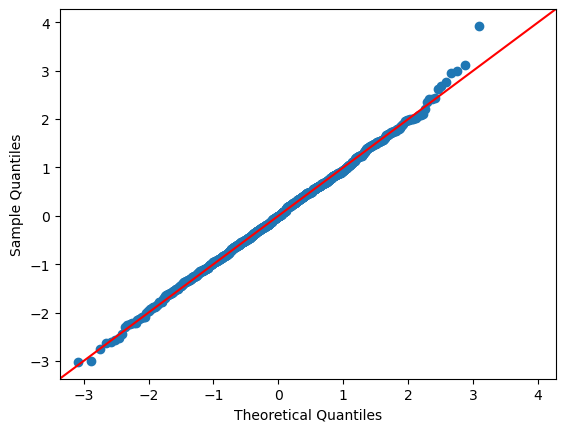

In [13]:
normal = np.random.normal(size=1000)

qqplot(normal, line='45');


In [12]:
model = SARIMAX(ARMA_1_1, order=(1,0,1), simple_differencing=False)
model_fit = model.fit(disp=False)
residuals = model_fit.resid

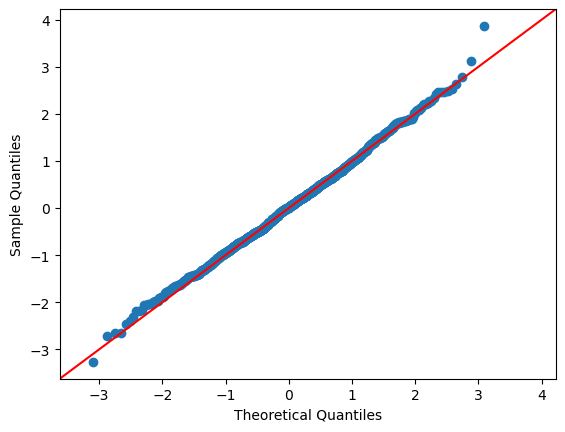

In [17]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='45');

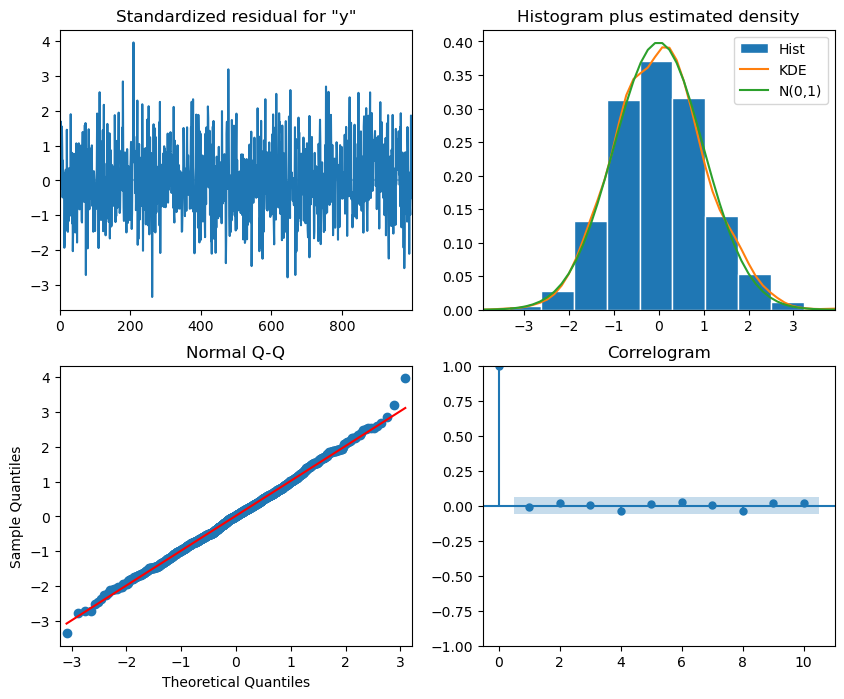

In [18]:
model_fit.plot_diagnostics(figsize=(10, 8));

In [19]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

lb_pvalue
